# Non-relativistic motion of charged particles in ideal dipole field of planet Earth using Runge-Kutta of 6th order

### 1) Equations of motions for non relativistic particles (using the lorentz factor)

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [2]:
# defining the constants

c = 299792458.0 # [m/s]  speed of light
Re = 6378137.0 # [m] earth's radius
B_0 = 3.07e-5
m_p = 1.6726219e-27 # [kg]  mass of proton
m_e = 9.10938356e-31 # [kg]  mass of electron
qe = 1.6021766210e-19 # [C]  elemantary charge
sinphi = np.sin(11.7*np.pi/180.0) # 11.7 degrees between magnetic and rotational axis
cosphi = np.cos(11.7*np.pi/180.0)

In [3]:
# defining an ideal dipole field of earth
# given in 10.1016@j.asr.2020.10.020.pdf eqn 4

def BP(R,t): 
    denom = (R[0]**2.0 + R[1]**2.0 + R[2]**2.0)**2.5
    BPx = -(B_0*Re**3)*((3.0*R[0]*R[2]*cosphi) + (3.0*R[0]*R[1]*sinphi))/denom
    BPy = -(B_0*Re**3)*((3.0*R[1]*R[2]*cosphi) + (2.0*sinphi*(R[1]**2.0)) - (sinphi*(R[0]**2.0)) - (sinphi*(R[2]**2.0)))/denom
    BPz = -(B_0*Re**3)*((2.0*cosphi*(R[2]**2.0)) - (cosphi*(R[0]**2.0)) - (cosphi*(R[1]**2.0)) + (3.0*R[2]*R[1]*sinphi))/denom  
    BP = np.array([BPx, BPy, BPz])
    return BP 

In [4]:
dt = 0.0001 # integration step  
ts = 40.0 # simulation duration
n_step = int(ts/dt) # number of steps

In [5]:
t = np.zeros(n_step) # initializing
rvek = np.zeros((len(t), 3))
vvek = np.zeros((len(t), 3))
gamma = np.empty(len(t))


In [6]:
# for particle type protons
m = 1.0*m_p  
q = 1.0*qe

In [7]:
rvek[0, :] = np.array([0.0, -7.85, -1.53])*Re
vvek[0, :] = np.array([0.0, 1.8e6, 1.8e6])

In [8]:
kinetic_init = m * 0.5 * np.linalg.norm(vvek[0, :]) ** 2.0
for i in range(1, n_step):  
    rk1 = rvek[i-1, :]
    vk1 = vvek[i-1, :]
    g1 = 1/(np.sqrt(1-((np.dot(vk1, vk1)/c**2))))
    ak1 = (q/(m*g1))*np.cross(vk1, BP(rk1,t[i-1]))
                 
     
    rk2 = rvek[i-1, :] + (0.25*vk1*dt)
    vk2 = vvek[i-1, :] + (0.25*ak1*dt)
    g2 = 1/(np.sqrt(1-((np.dot(vk2, vk2)/c**2))))
    ak2 =  (q/(m*g2))*np.cross(vk2, BP(rk2, t[i-1]+(0.25*dt)))
    
    rk3 = rvek[i-1, :] + ((3*dt/32)*(vk1+(3*vk2)))
    vk3 = vvek[i-1, :] + ((3*dt/32)*(ak1+(3*ak2)))
    g3 = 1/(np.sqrt(1-((np.dot(vk3, vk3)/c**2))))            
    ak3 = (q/(m*g3))*np.cross(vk3, BP(rk3, t[i-1]+((3/8)*dt)))
                              
    rk4 = rvek[i-1, :] + ((12*dt/2197)*((161*vk1)-(600*vk2)+(608*vk3)))
    vk4 = vvek[i-1, :] + ((12*dt/2197)*((161*ak1)-(600*ak2)+(608*ak3)))
    g4 = 1/(np.sqrt(1-((np.dot(vk4, vk4)/c**2))))
    ak4 = (q/(m*g4))*np.cross(vk4, BP(rk4, t[i-1]+((12/13)*dt)))
                              
    rk5 = rvek[i-1, :] + ((dt/4104)*((8341*vk1)-(32832*vk2)+(29440*vk3)-(845*vk4)))
    vk5 = vvek[i-1, :] + ((dt/4104)*((8341*ak1)-(32832*ak2)+(29440*ak3)-(845*ak4)))
    g5 = 1/(np.sqrt(1-((np.dot(vk5, vk5)/c**2))))
    ak5 = (q/(m*g5))*np.cross(vk5, BP(rk5, t[i-1]+dt))
                 
    rk6 = rvek[i-1, :] + (dt*(-((8/27)*vk1)+(2*vk2)-((3544/2565)*vk3)+((1859/4104)*vk4)+((11/40)*vk5)))
    vk6 = vvek[i-1, :] + (dt*(-((8/27)*ak1)+(2*ak2)-((3544/2565)*ak3)+((1859/4104)*ak4)+((11/40)*ak5)))
    g6 = 1/(np.sqrt(1-((np.dot(vk6, vk6)/c**2))))
    ak6 = (q/(m*g6))*np.cross(vk6, BP(rk6, t[i-1]+(0.5*dt)))
    
    
    rvek[i] = rvek[i-1, :] + (dt/5.0)*(((16/27)*vk1) + ((6656/2565)*vk3) + ((28561/11286)*vk4) -((9/10)*vk5) + ((2/11)*vk6))
    vvek[i] = vvek[i-1, :] + (dt/5.0)*(((16/27)*ak1) + ((6656/2565)*ak3) + ((28561/11286)*ak4) -((9/10)*ak5) + ((2/11)*ak6))
    gamma[i] = 1/(np.sqrt(1-((np.dot(vvek[i], vvek[i])/c**2)))) 
    t[i] = t[i-1] + dt
    
    
       
    #print(t[i], vvek[i, :])
    #print(t[i], gamma[i])

kinetic_final = m * 0.5 * np.linalg.norm(vvek[-1, :]) ** 2.0
ans = abs(kinetic_init - kinetic_final)/kinetic_init
print(ans)
    
               

0.003439014985716297


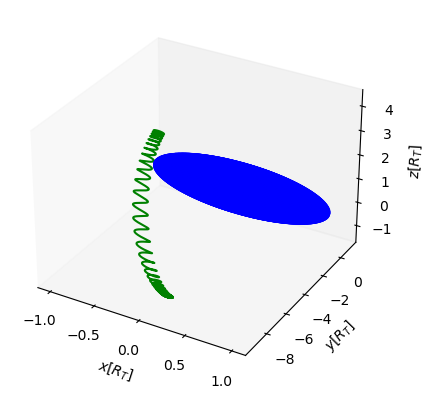

In [9]:
fig = plt.figure() # graphical representation
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('auto')
ax.grid(False)
u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j] # Earth as a ball
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax.plot_wireframe(x, y, z, color = "blue")
plt.xlabel("$x[R_T]$")
plt.ylabel("$y[R_T]$")
ax.set_zlabel("$z[R_T]$")
plt.axis('on')
#ax.set_xlim3d(-75, 75) # change if needed
#ax.set_ylim3d(-75, 75)
#ax.set_zlim3d(-75, 75)
plt.plot(rvek[:, 0]/Re, rvek[:, 1]/Re, rvek[:, 2]/Re, color = 'green')
plt.show()

Text(0, 0.5, 'Lorentz factor')

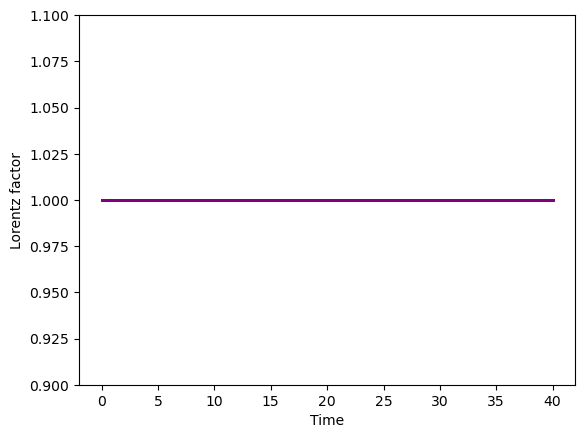

In [10]:
plt.scatter(t,gamma, color='purple', s=1)
plt.ylim(0.9,1.1 )
plt.xlabel('Time')
plt.ylabel('Lorentz factor')